## P71082A Advanced Quantitative Methods

### Coding Assigment 2022-2023: Data Extraction and Statistical Analysis with Bayes Factors


#### Code file for first three Tasks 

### Task 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load data from CSV file
data = pd.read_csv('data_young_old_pd.csv')

In [3]:
# Compute mIKI from logmIKI
data['mIKI'] = np.exp(data['logmIKI'])

data.head()

,subj,group,trial,logmIKI,mIKI
0,1,1,1,6.2059,495.664854
1,1,1,2,5.9278,375.327884
2,1,1,3,5.8461,345.882804
3,1,1,4,5.8381,343.126780
4,1,1,5,5.9837,396.906208


In [4]:
# Extract data for each group
group0_data = data[data['group'] == 0]
group1_data = data[data['group'] == 1]
group2_data = data[data['group'] == 2]

In [5]:
# Compute mean and standard error of the mean for each group and trial
group0_stats = group0_data.groupby('trial').agg({'logmIKI': ['mean', 'sem']})
group1_stats = group1_data.groupby('trial').agg({'logmIKI': ['mean', 'sem']})
group2_stats = group2_data.groupby('trial').agg({'logmIKI': ['mean', 'sem']})

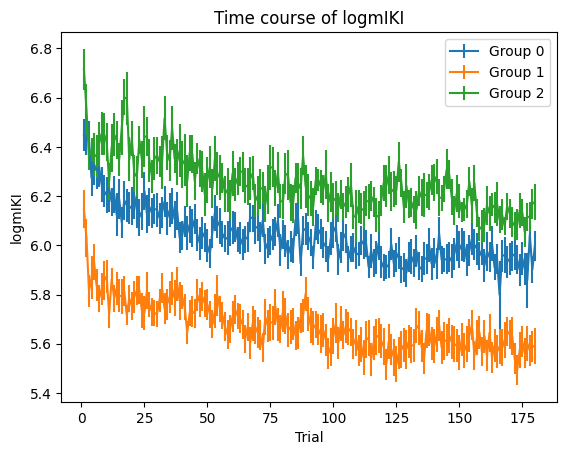

In [6]:
# Create figure 1 with logmIKI data
fig1, ax1 = plt.subplots()
ax1.errorbar(group0_stats.index, group0_stats['logmIKI']['mean'], yerr=group0_stats['logmIKI']['sem'], label='Group 0')
ax1.errorbar(group1_stats.index, group1_stats['logmIKI']['mean'], yerr=group1_stats['logmIKI']['sem'], label='Group 1')
ax1.errorbar(group2_stats.index, group2_stats['logmIKI']['mean'], yerr=group2_stats['logmIKI']['sem'], label='Group 2')
ax1.set_xlabel('Trial')
ax1.set_ylabel('logmIKI')
ax1.set_title('Time course of logmIKI')
ax1.legend()

#Save figure
fig1.savefig('Time course of logmIKI.png', dpi=300)

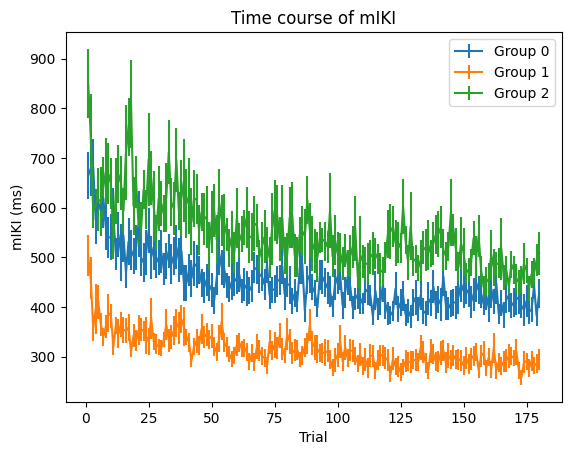

In [7]:
# Calculate the mean and standard error of mIKI for each group at each trial
group0_stats = group0_data.groupby('trial')['mIKI'].agg(['mean', 'sem'])
group1_stats = group1_data.groupby('trial')['mIKI'].agg(['mean', 'sem'])
group2_stats = group2_data.groupby('trial')['mIKI'].agg(['mean', 'sem'])

# Plot the time course of exp(logmIKI) for each group separately
fig2, ax2 = plt.subplots()
ax2.errorbar(group0_stats.index, group0_stats['mean'], yerr=group0_stats['sem'], label='Group 0')
ax2.errorbar(group1_stats.index, group1_stats['mean'], yerr=group1_stats['sem'], label='Group 1')
ax2.errorbar(group2_stats.index, group2_stats['mean'], yerr=group2_stats['sem'], label='Group 2')
ax2.set_xlabel('Trial')
ax2.set_ylabel('mIKI (ms)')
ax2.set_title('Time course of mIKI')
ax2.legend()
plt.show()

#Save figure
fig2.savefig('Time course of mIKI.png', dpi=300)

### Task 2

In [8]:
# Compute trial-average of logmIKI and mIKI separately for each participant and group
grouped_data = data.groupby(['subj', 'group'])

In [9]:
# Calculate the mean of logmIKI and mIKI for each group
logmIKI_avg = grouped_data['logmIKI'].mean()
mIKI_avg = grouped_data['mIKI'].mean()

In [10]:
# Compute mean and standard error of the mean of mIKI for each group
group_stats = mIKI_avg.groupby('group').agg(['mean', 'sem'])

In [11]:
# Print the results
print('Trial-average of logmIKI and mIKI separately for each participant and group:')
print(logmIKI_avg)
print(mIKI_avg)

print('Mean and s.e.m. of mIKI in each group:')
print(group_stats)

Trial-average of logmIKI and mIKI separately for each participant and group:
subj  group
1     1        5.731554
2     1        6.185189
3     1        5.187282
4     1        5.754527
5     1        6.076681
                 ...   
89    2        6.310674
90    2        6.382850
91    2        6.273969
92    2        6.747739
93    2        6.076609
Name: logmIKI, Length: 92, dtype: float64
subj  group
1     1        313.832668
2     1        499.350132
3     1        184.629213
4     1        321.148956
5     1        461.404076
                  ...    
89    2        559.556591
90    2        624.227104
91    2        533.691470
92    2        889.445462
93    2        459.562428
Name: mIKI, Length: 92, dtype: float64
Mean and s.e.m. of mIKI in each group:
             mean        sem
group                       
0      451.048764  20.735215
1      316.774421  15.934282
2      547.888239  26.852956


In [12]:
# Save trial average to CSV files
logmIKI_avg.to_csv('logmIKI_trialavg.csv')
mIKI_avg.to_csv('mIKI_trialavg.csv')

### Task 3

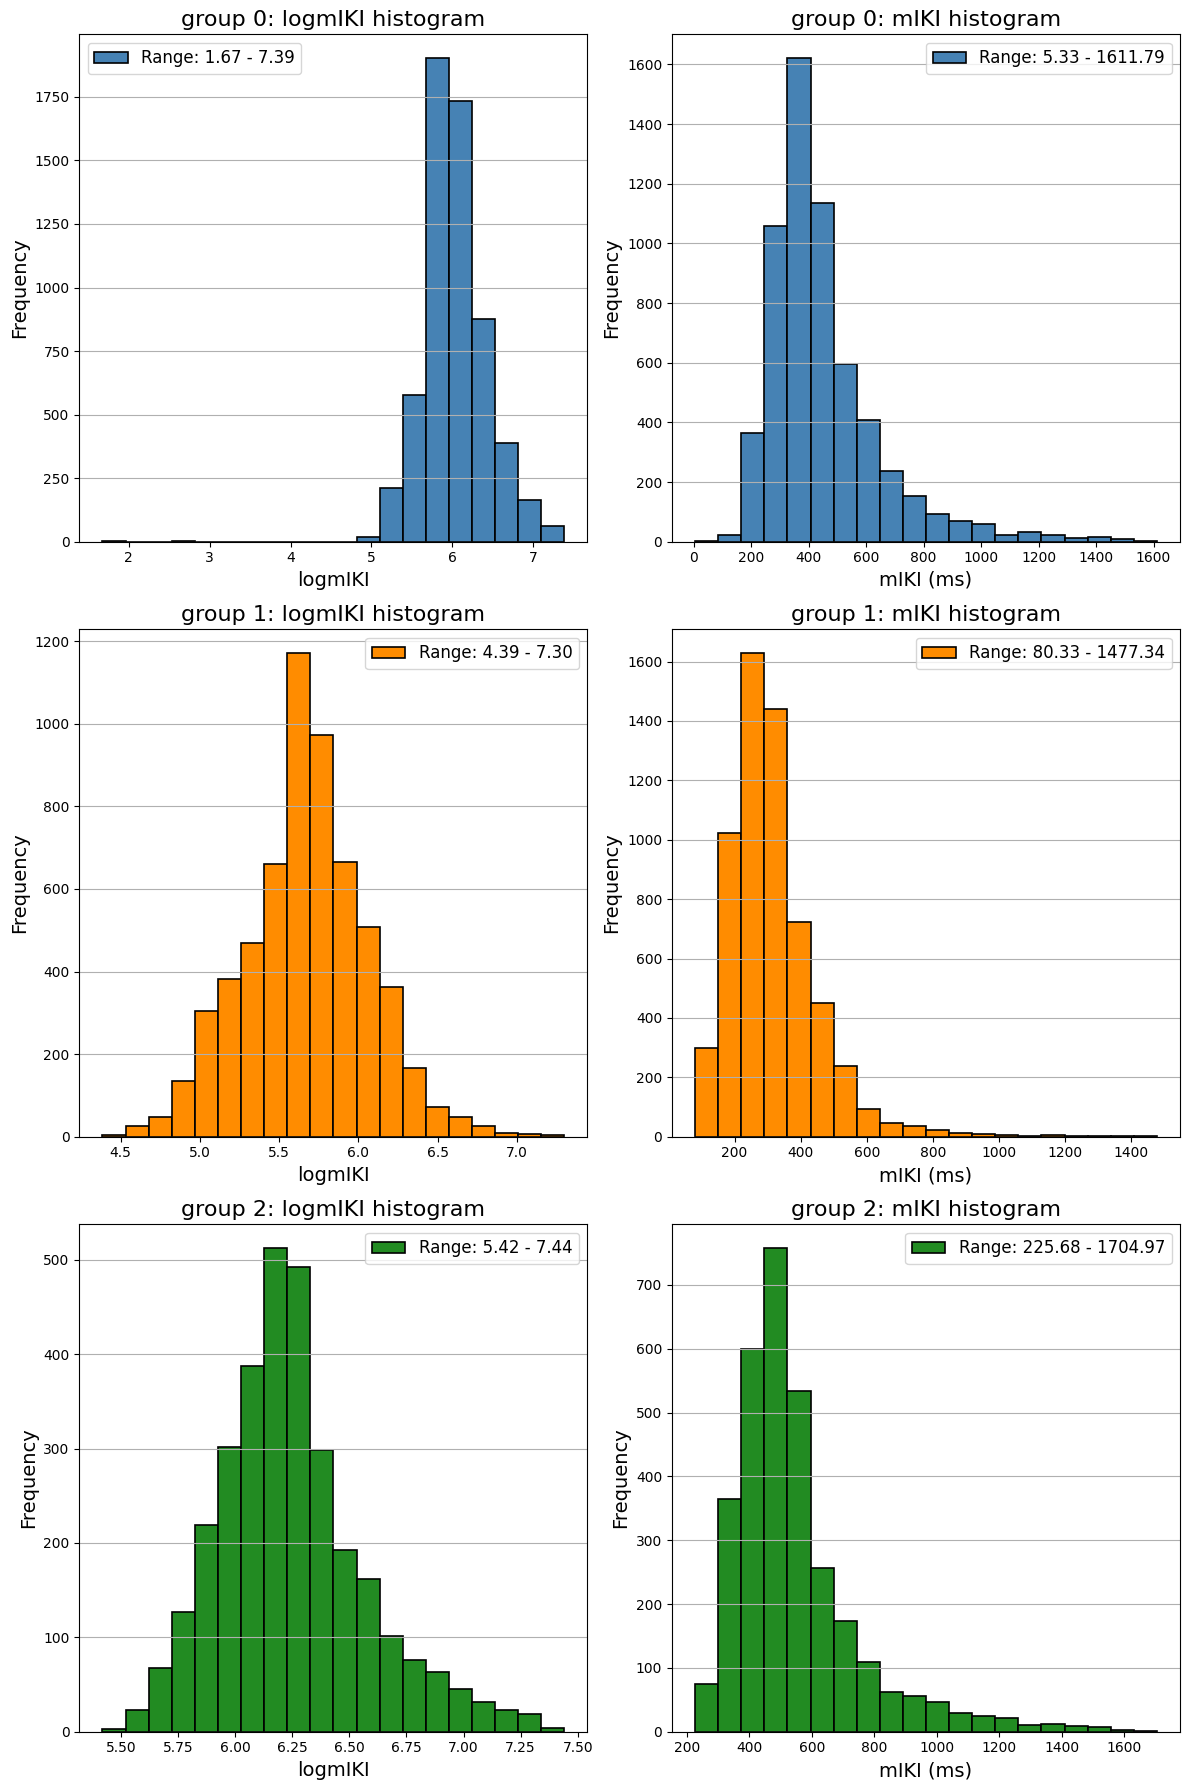

In [13]:
# Plot histograms of logmIKI and mIKI separately for each group
fig, axs = plt.subplots(3, 2, figsize=(12, 18))

bins = 20
edgecolor = 'black'
linewidth = 1.2
colors = ['steelblue', 'darkorange', 'forestgreen']

for i, group in enumerate(['young', 'old', 'pd']):
    group_data = data[data['group']==i]
    axs[i, 0].hist(group_data['logmIKI'], bins=bins, edgecolor=edgecolor, linewidth=linewidth, color=colors[i])
    axs[i, 0].set_xlabel('logmIKI', fontsize=14)
    axs[i, 0].set_ylabel('Frequency', fontsize=14)
    axs[i, 0].set_title('group {}: logmIKI histogram'.format(i), fontsize=16)
    axs[i, 0].grid(axis='y')

    axs[i, 1].hist(group_data['mIKI'], bins=bins, edgecolor=edgecolor, linewidth=linewidth, color=colors[i])
    axs[i, 1].set_xlabel('mIKI (ms)', fontsize=14)
    axs[i, 1].set_ylabel('Frequency', fontsize=14)
    axs[i, 1].set_title('group {}: mIKI histogram'.format(i), fontsize=16)
    axs[i, 1].grid(axis='y')
    
    # Set x-axis limits and add legend
    logmIKI_range = (group_data['logmIKI'].min(), group_data['logmIKI'].max())
    mIKI_range = (group_data['mIKI'].min(), group_data['mIKI'].max())
    axs[i, 0].legend(['Range: {:.2f} - {:.2f}'.format(logmIKI_range[0], logmIKI_range[1])],
                     fontsize=12, loc='best')
    axs[i, 1].legend(['Range: {:.2f} - {:.2f}'.format(mIKI_range[0], mIKI_range[1])],
                     fontsize=12, loc='best')

plt.tight_layout()
plt.show()

# save the plot as a PNG file
fig.savefig('histograms.png', dpi=300)

